# ***Import the libraries***

In [1]:
# 1. Import Libraries


# Core data and numerical libraries
import pandas as pd
import numpy as np

# Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessing
from sklearn.preprocessing import StandardScaler

# Plot style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)

print("Libraries imported successfully.")


Libraries imported successfully.


# ***Load Database***

In [2]:
import kagglehub

#2. Download latest version
path = kagglehub.dataset_download("vigneshvenkateswaran/bot-iot")

print("Path to dataset files:", path)

100%|██████████| 1.17G/1.17G [00:09<00:00, 128MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/vigneshvenkateswaran/bot-iot/versions/1


In [3]:
import os

# 3. Load Dataset
# The previous cell downloaded the dataset to the path stored in the 'path' variable.
# The error indicates that the file '/kaggle/input/bot-iot/data_33.csv' was not found.
# We need to construct the correct path using the 'path' variable.
file_path = os.path.join(path, "data_33.csv")
df = pd.read_csv(file_path, sep=",", low_memory=False)
print("Dataset loaded successfully.")

Dataset loaded successfully.


In [4]:
df.columns = df.columns.str.strip()

In [5]:
df_sample = df.sample(n=100000, random_state=42)
print("Sample shape:", df_sample.shape)


Sample shape: (100000, 35)


# ***Read Data***

In [6]:
print("INFO")
df.info()

INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 35 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   pkSeqID      1000000 non-null  int64  
 1   stime        1000000 non-null  float64
 2   flgs         1000000 non-null  object 
 3   proto        1000000 non-null  object 
 4   saddr        1000000 non-null  object 
 5   sport        999978 non-null   object 
 6   daddr        1000000 non-null  object 
 7   dport        999978 non-null   object 
 8   pkts         1000000 non-null  int64  
 9   bytes        1000000 non-null  int64  
 10  state        1000000 non-null  object 
 11  ltime        1000000 non-null  float64
 12  seq          1000000 non-null  int64  
 13  dur          1000000 non-null  float64
 14  mean         1000000 non-null  float64
 15  stddev       1000000 non-null  float64
 16  smac         0 non-null        float64
 17  dmac         0 non-null        float64
 18

In [57]:
print("\n DESCRIBE ")
print(df.describe())


 DESCRIBE 
                 flgs           proto           saddr           sport  \
count  1000000.000000  1000000.000000  1000000.000000  1000000.000000   
mean         0.028103        2.999894        1.486158    57991.206363   
std          0.235400        0.016186        1.122632    33286.824392   
min          0.000000        0.000000        0.000000        0.000000   
25%          0.000000        3.000000        0.000000    31044.000000   
50%          0.000000        3.000000        1.000000    55090.000000   
75%          0.000000        3.000000        2.000000    87373.000000   
max          2.000000        3.000000        9.000000   115430.000000   

                daddr           dport          pkts         bytes  \
count  1000000.000000  1000000.000000  1.000000e+06  1.000000e+06   
mean         8.742485        7.098325 -1.955414e-17 -8.189005e-19   
std          1.912965        0.299492  1.000000e+00  1.000001e+00   
min          0.000000        0.000000 -2.445316e-01 -2

In [8]:
print("\n COLUMNS ")
print(df.columns)


 COLUMNS 
Index(['pkSeqID', 'stime', 'flgs', 'proto', 'saddr', 'sport', 'daddr', 'dport',
       'pkts', 'bytes', 'state', 'ltime', 'seq', 'dur', 'mean', 'stddev',
       'smac', 'dmac', 'sum', 'min', 'max', 'soui', 'doui', 'sco', 'dco',
       'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'srate', 'drate',
       'attack', 'category', 'subcategory'],
      dtype='object')


In [9]:
print("\n MISSING VALUES ")
print(df.isnull().sum())


 MISSING VALUES 
pkSeqID              0
stime                0
flgs                 0
proto                0
saddr                0
sport               22
daddr                0
dport               22
pkts                 0
bytes                0
state                0
ltime                0
seq                  0
dur                  0
mean                 0
stddev               0
smac           1000000
dmac           1000000
sum                  0
min                  0
max                  0
soui           1000000
doui           1000000
sco            1000000
dco            1000000
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
srate                0
drate                0
attack               0
category             0
subcategory          0
dtype: int64


In [10]:
print("\n FIRST ROWS ")
df.head()



 FIRST ROWS 


,pkSeqID,stime,flgs,proto,saddr,sport,daddr,dport,pkts,bytes,...,spkts,dpkts,sbytes,dbytes,rate,srate,drate,attack,category,subcategory
0,32000001,1.528087e+09,e,udp,192.168.100.149,21451,192.168.100.6,80,2,120,...,2,0,120,0,0.32448,0.32448,0.0,1,DoS,UDP
1,32000002,1.528087e+09,e,udp,192.168.100.149,21452,192.168.100.6,80,2,120,...,2,0,120,0,0.32448,0.32448,0.0,1,DoS,UDP
2,32000003,1.528087e+09,e,udp,192.168.100.149,21453,192.168.100.6,80,2,120,...,2,0,120,0,0.32448,0.32448,0.0,1,DoS,UDP
3,32000004,1.528087e+09,e,udp,192.168.100.149,21454,192.168.100.6,80,2,120,...,2,0,120,0,0.32448,0.32448,0.0,1,DoS,UDP
4,32000005,1.528087e+09,e,udp,192.168.100.149,21455,192.168.100.6,80,2,120,...,2,0,120,0,0.32448,0.32448,0.0,1,DoS,UDP


In [11]:
# Counts the number of each value in the "attack" column.
# This column indicates whether the network flow is an attack (1) or normal traffic (0).
# Purpose: Helps us understand the distribution of attacks vs normal connections.
df['attack'].value_counts()

,count
attack,
1,999973
0,27


In [12]:
# Counts the number of occurrences of each attack category.
# Examples: DoS, DDoS, Theft, Recon, etc.
# Purpose: Shows which attack types are most common in the dataset.
df['category'].value_counts()

,count
category,
DoS,999973
Normal,27


In [13]:
# Counts the number of occurrences of each network protocol.
# Examples: TCP, UDP, ICMP, etc.
# Purpose: Helps identify which protocol is used most frequently in the traffic.
df['proto'].value_counts()

,count
proto,
udp,999950
arp,22
tcp,16
icmp,12


# ***EDA Plots***

### Question 1:
What is the distribution of attack traffic vs normal traffic in the dataset?

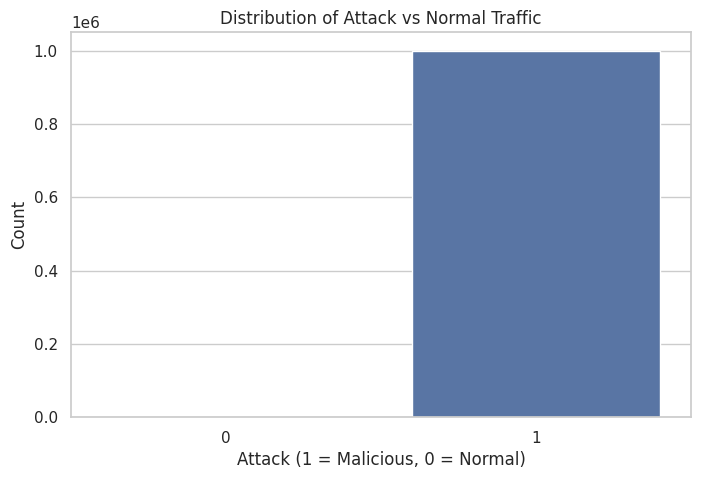

In [14]:
# Visualization: Attack vs Normal Traffic
sns.countplot(x='attack', data=df)
plt.title("Distribution of Attack vs Normal Traffic")
plt.xlabel("Attack (1 = Malicious, 0 = Normal)")
plt.ylabel("Count")
plt.show()

Question 2:

What is the most common type of attack in the dataset?

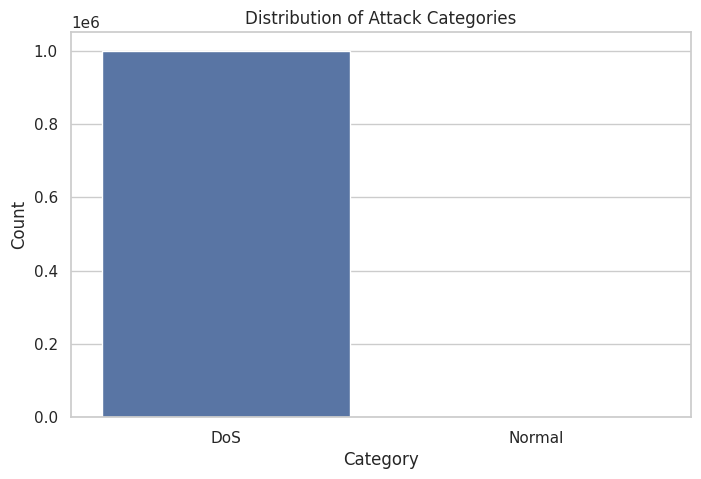

In [15]:
# Visualization: Most Common Attack Category
sns.countplot(x='category', data=df)
plt.title("Distribution of Attack Categories")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

### Question 3:
Which network protocol is most commonly used in the dataset?

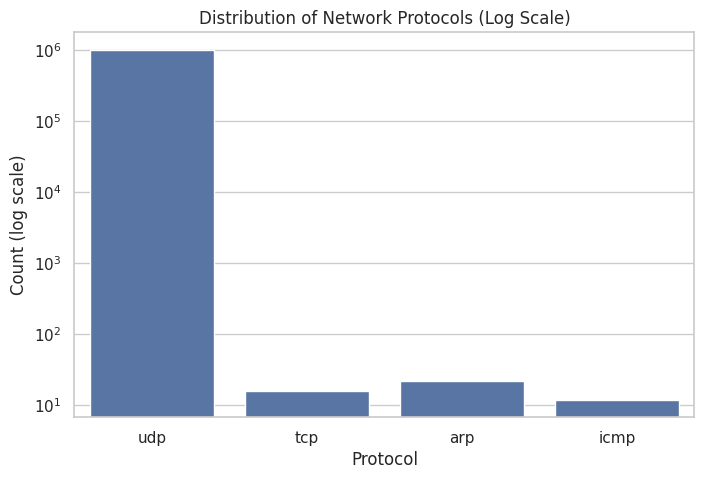

In [16]:
# Visualization: Most Common Network Protocol (Log Scale)
sns.countplot(x='proto', data=df)
plt.yscale('log')
plt.title("Distribution of Network Protocols (Log Scale)")
plt.xlabel("Protocol")
plt.ylabel("Count (log scale)")
plt.show()

### Question 4:
What is the distribution of the number of packets in each connection?

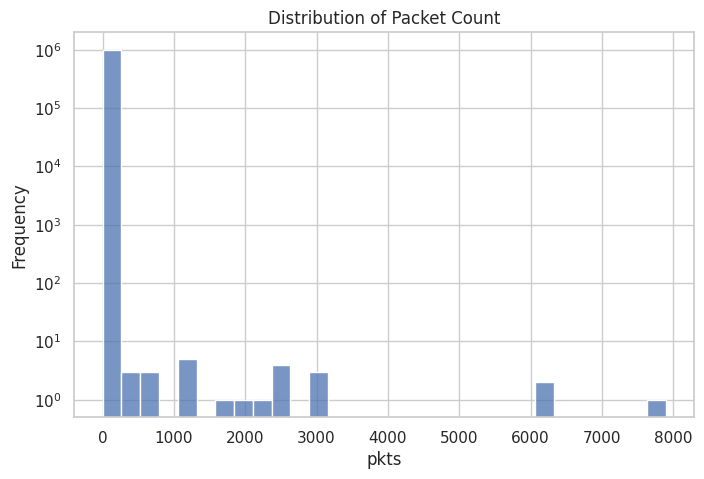

In [17]:
sns.histplot(df['pkts'], bins=30)
plt.title("Distribution of Packet Count")
plt.xlabel("pkts")
plt.ylabel("Frequency")
plt.yscale('log')
plt.show()

### Question 5:
How large is the data transferred in each connection?

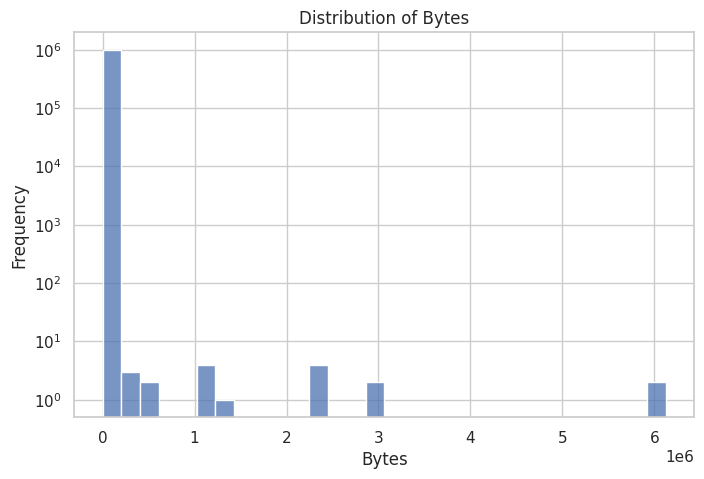

In [18]:
sns.histplot(df['bytes'], bins=30)
plt.title("Distribution of Bytes")
plt.xlabel("Bytes")
plt.ylabel("Frequency")
plt.yscale('log')
plt.show()

### Question 6:
What is the distribution of bytes values?

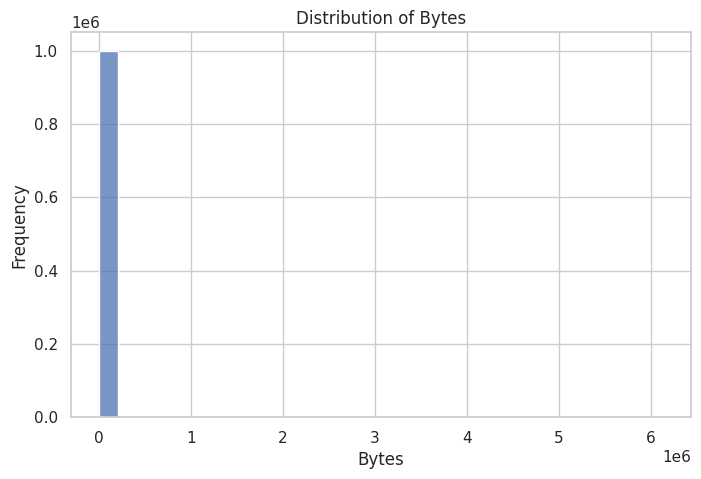

In [19]:
# Visualization: Histogram of bytes
sns.histplot(df['bytes'], bins=30)
plt.title("Distribution of Bytes")
plt.xlabel("Bytes")
plt.ylabel("Frequency")
plt.show()

### Question 7:
Is there a relationship between pkts and bytes?

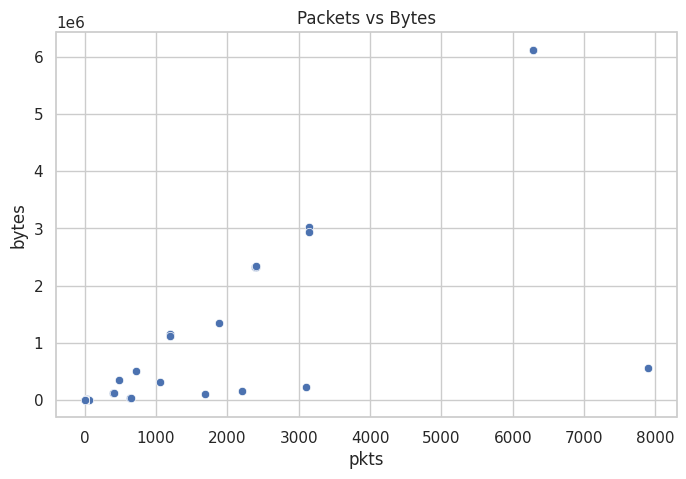

In [20]:
# Visualization: Scatter Plot
sns.scatterplot(x='pkts', y='bytes', data=df)
plt.title("Packets vs Bytes")
plt.xlabel("pkts")
plt.ylabel("bytes")
plt.show()

### Question 8:
What is the correlation between numerical features?

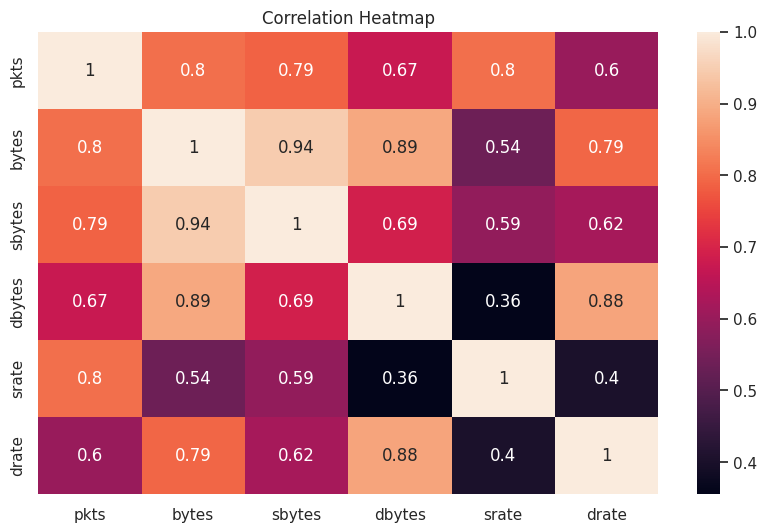

In [21]:
# Visualization: Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df[['pkts','bytes','sbytes','dbytes','srate','drate']].corr(), annot=True)
plt.title("Correlation Heatmap")
plt.show()

Question 9:

Is there any outlier in packet count?

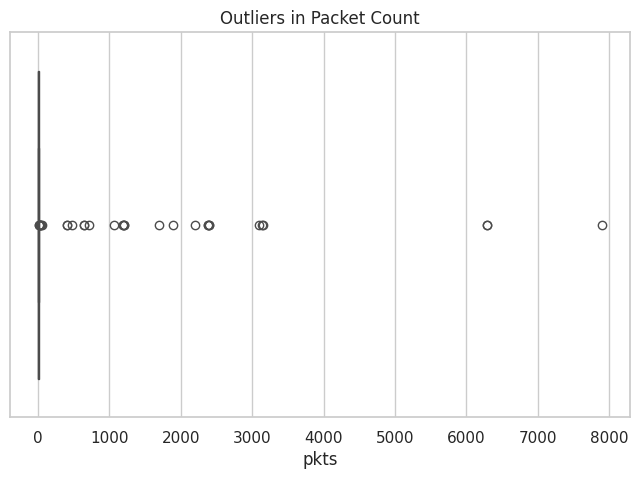

In [22]:
# Visualization: Boxplot
sns.boxplot(x=df['pkts'])
plt.title("Outliers in Packet Count")
plt.xlabel("pkts")
plt.show()

# ***Preprocessing***

**STEP 1: Identify useless columns**

In [23]:
cols_to_drop = ['pkSeqID','stime','ltime',
                'smac','dmac','soui', 'doui','sco','dco']

df.drop(columns=cols_to_drop, inplace=True)
print("Remaining columns:", df.columns)

Remaining columns: Index(['flgs', 'proto', 'saddr', 'sport', 'daddr', 'dport', 'pkts', 'bytes',
       'state', 'seq', 'dur', 'mean', 'stddev', 'sum', 'min', 'max', 'spkts',
       'dpkts', 'sbytes', 'dbytes', 'rate', 'srate', 'drate', 'attack',
       'category', 'subcategory'],
      dtype='object')


In [24]:
print(df.columns)

Index(['flgs', 'proto', 'saddr', 'sport', 'daddr', 'dport', 'pkts', 'bytes',
       'state', 'seq', 'dur', 'mean', 'stddev', 'sum', 'min', 'max', 'spkts',
       'dpkts', 'sbytes', 'dbytes', 'rate', 'srate', 'drate', 'attack',
       'category', 'subcategory'],
      dtype='object')


**STEP 2: Encode All Categorical Columns**

In [25]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

# Select only columns that are object type
obj_cols = df.select_dtypes(include='object').columns

for c in obj_cols:
    df[c] = encoder.fit_transform(df[c])

In [26]:
print(df.dtypes.value_counts())

int64      17
float64     9
Name: count, dtype: int64


**STEP 3: Handle missing data**

In [27]:
df['sport'].fillna(df['sport'].mode()[0], inplace=True)
df['dport'].fillna(df['dport'].mode()[0], inplace=True)
df=df.fillna(0)

/tmp/ipython-input-795821713.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['sport'].fillna(df['sport'].mode()[0], inplace=True)
/tmp/ipython-input-795821713.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', t

In [28]:
print(df.isnull().sum().sum())

0


In [29]:
print(df[['sport','dport']].isnull().sum())

sport    0
dport    0
dtype: int64


**STEP 4: Check again**

In [30]:
print(df.isnull().sum())

flgs           0
proto          0
saddr          0
sport          0
daddr          0
dport          0
pkts           0
bytes          0
state          0
seq            0
dur            0
mean           0
stddev         0
sum            0
min            0
max            0
spkts          0
dpkts          0
sbytes         0
dbytes         0
rate           0
srate          0
drate          0
attack         0
category       0
subcategory    0
dtype: int64


**STEP 5: Scale Numerical Features**

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_cols = ['pkts','bytes','sbytes','dbytes','drate','srate','dur']
df[num_cols] = scaler.fit_transform(df[num_cols])

In [32]:
print(df.head())

   flgs  proto  saddr  sport  daddr  dport      pkts     bytes  state    seq  \
0     0      3      2  25245     10      7 -0.177677 -0.017372      1  47170   
1     0      3      2  25247     10      7 -0.177677 -0.017372      1  47171   
2     0      3      2  25249     10      7 -0.177677 -0.017372      1  47172   
3     0      3      2  25251     10      7 -0.177677 -0.017372      1  47173   
4     0      3      2  25253     10      7 -0.177677 -0.017372      1  47174   

   ...  spkts  dpkts  sbytes    dbytes     rate     srate     drate  attack  \
0  ...      2      0 -0.0259 -0.002174  0.32448  0.193134 -0.002484       1   
1  ...      2      0 -0.0259 -0.002174  0.32448  0.193134 -0.002484       1   
2  ...      2      0 -0.0259 -0.002174  0.32448  0.193134 -0.002484       1   
3  ...      2      0 -0.0259 -0.002174  0.32448  0.193134 -0.002484       1   
4  ...      2      0 -0.0259 -0.002174  0.32448  0.193134 -0.002484       1   

   category  subcategory  
0         0      

In [33]:
print(df.dtypes)

flgs             int64
proto            int64
saddr            int64
sport            int64
daddr            int64
dport            int64
pkts           float64
bytes          float64
state            int64
seq              int64
dur            float64
mean           float64
stddev         float64
sum            float64
min            float64
max            float64
spkts            int64
dpkts            int64
sbytes         float64
dbytes         float64
rate           float64
srate          float64
drate          float64
attack           int64
category         int64
subcategory      int64
dtype: object


In [34]:
print(df.isnull().sum())

flgs           0
proto          0
saddr          0
sport          0
daddr          0
dport          0
pkts           0
bytes          0
state          0
seq            0
dur            0
mean           0
stddev         0
sum            0
min            0
max            0
spkts          0
dpkts          0
sbytes         0
dbytes         0
rate           0
srate          0
drate          0
attack         0
category       0
subcategory    0
dtype: int64


**Ster 6 : Encode Column**

In [35]:
print(df.columns)

Index(['flgs', 'proto', 'saddr', 'sport', 'daddr', 'dport', 'pkts', 'bytes',
       'state', 'seq', 'dur', 'mean', 'stddev', 'sum', 'min', 'max', 'spkts',
       'dpkts', 'sbytes', 'dbytes', 'rate', 'srate', 'drate', 'attack',
       'category', 'subcategory'],
      dtype='object')


In [36]:
print(df.columns.tolist())

['flgs', 'proto', 'saddr', 'sport', 'daddr', 'dport', 'pkts', 'bytes', 'state', 'seq', 'dur', 'mean', 'stddev', 'sum', 'min', 'max', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'srate', 'drate', 'attack', 'category', 'subcategory']


In [37]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

obj_cols = df.select_dtypes(include='object').columns

for c in obj_cols:
    df[c] = encoder.fit_transform(df[c])

In [38]:
print(df.dtypes.value_counts())

int64      13
float64    13
Name: count, dtype: int64


**Step 7: Split the Data**

In [94]:
# === FIX FOR IMBALANCED DATA ===

from imblearn.over_sampling import RandomOverSampler

X = df.drop(['attack'], axis=1)
y = df['attack']

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled,
    test_size=0.2,
    random_state=42,
    stratify=y_resampled
)

print("Balanced y_test distribution:")
print(y_test.value_counts())

Balanced y_test distribution:
attack
0    199995
1    199995
Name: count, dtype: int64


# **Start Building the Machine Learning Model**

**Step 0: Build The First ML Model**

**Step 1 : Split Feature and Target**

In [83]:
X = df.drop(['attack'], axis=1)
y = df['attack']

In [84]:
print(X.shape, y.shape)

(1000000, 25) (1000000,)


**Step 2 : Train / Test Split**

In [108]:
from sklearn.model_selection import train_test_split

X = df.drop(['attack'], axis=1)
y = df['attack']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train distribution:")
print(y_train.value_counts())
print("\nTest distribution:")
print(y_test.value_counts())

Train distribution:
attack
1    799978
0        22
Name: count, dtype: int64

Test distribution:
attack
1    199995
0         5
Name: count, dtype: int64


# ***Model 1 : Logistic Regression Model***

**Step 1: Train model**

In [119]:

from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=200, class_weight='balanced')
log_model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', max_iter=200)

**Step 2: Predictions**

In [120]:
log_pred = log_model.predict(X_test)

**Step 3: Evaluate **

In [121]:
print("Accuracy:", accuracy_score(y_test, log_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, log_pred))
print("\nClassification Report:\n", classification_report(y_test, log_pred))

Accuracy: 0.99997

Confusion Matrix:
 [[     5      0]
 [     6 199989]]

Classification Report:
               precision    recall  f1-score   support

           0       0.45      1.00      0.62         5
           1       1.00      1.00      1.00    199995

    accuracy                           1.00    200000
   macro avg       0.73      1.00      0.81    200000
weighted avg       1.00      1.00      1.00    200000



**Step 4 : Save Model**

In [125]:
import joblib
joblib.dump(log_model, "logistic_model.pkl")
joblib.dump(X.columns.tolist(), "features.pkl")

['features.pkl']

**Step 4: Confusion Matrix**

In [122]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[     5      0]
 [199991      4]]


**Step 5: Classification Report**

In [123]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      1.00      0.00         5
           1       1.00      0.00      0.00    199995

    accuracy                           0.00    200000
   macro avg       0.50      0.50      0.00    200000
weighted avg       1.00      0.00      0.00    200000

